In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the project root to Python path
project_root = str(Path(os.getcwd()).parent)
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.data_reader import read_raw_enphase_data_file, read_raw_studer_data_directory,  read_raw_weather_open_weather_data_file

# Data Exploration

## 1. Read Raw Data

### 1.1. Read Raw Enphase Data


In [3]:
enphase_data = read_raw_enphase_data_file('enphase_15m_Jan23_Sep24_total.csv')
enphase_data.head()

,Date/Time,Energy Produced (Wh),Energy Consumed (Wh),Exported to Grid (Wh),Imported from Grid (Wh)
0,01/20/2023 00:00,2,0,2,0
1,01/20/2023 00:15,2,0,2,0
2,01/20/2023 00:30,2,0,2,0
3,01/20/2023 00:45,2,0,2,0
4,01/20/2023 01:00,2,0,2,0


#### Date index and sorting

In [4]:
enphase_data['Date'] = pd.to_datetime(enphase_data['Date/Time'], dayfirst=True)
enphase_data.drop('Date/Time', axis=1, inplace=True)
enphase_data.set_index('Date', inplace=True)
enphase_data.sort_index(inplace=True)

enphase_data.head()

C:\Users\burha\AppData\Local\Temp\ipykernel_48432\4112832217.py:1: UserWarning: Parsing dates in %m/%d/%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  enphase_data['Date'] = pd.to_datetime(enphase_data['Date/Time'], dayfirst=True)


,Energy Produced (Wh),Energy Consumed (Wh),Exported to Grid (Wh),Imported from Grid (Wh)
Date,,,,
2023-01-20 00:00:00,2,0,2,0
2023-01-20 00:15:00,2,0,2,0
2023-01-20 00:30:00,2,0,2,0
2023-01-20 00:45:00,2,0,2,0
2023-01-20 01:00:00,2,0,2,0


### 1.2. Read Raw Studer Data

In [5]:
studer_data_dir = os.path.join(project_root, 'data', 'sample', 'studer')

studer_data = read_raw_studer_data_directory(studer_data_dir)
studer_data.head()

,Timestamp,Battery Voltage - L1,Battery Voltage - L2,Battery Voltage - L3,Grid Input Voltage - L1,Grid Input Voltage - L2,Grid Input Voltage - L3,Grid Input Current - L1,Grid Input Current - L2,Grid Input Current - L3,...,Studer Temperature - L3-3,Battery Voltage,Battery Current,Battery State of Charge,Battery Internal Temperature,Solar Power,Dev XT-DBG1,Dev BSP-locE,Dev Sys MSG,Dev Sys SCOM Err
0,06.09.2023 00:00,52.50,52.25,52.75,248.0,248.0,248.0,2.30,1.16,1.16,...,39.0,52.59,-4.12,100.0,29.0,0.0,0.0,9.0,NaN,0.0
1,06.09.2023 00:01,52.50,52.25,52.75,247.0,249.0,249.0,2.30,1.16,1.31,...,39.0,52.59,-4.08,100.0,29.0,0.0,0.0,9.0,NaN,0.0
2,06.09.2023 00:02,52.50,52.25,52.75,247.0,249.0,248.0,2.47,1.16,1.31,...,39.0,52.59,-4.24,100.0,29.0,0.0,0.0,9.0,NaN,0.0
3,06.09.2023 00:03,52.50,52.25,52.88,248.0,248.0,248.0,2.47,1.16,1.16,...,39.0,52.59,-4.17,100.0,29.0,0.0,0.0,9.0,NaN,0.0
4,06.09.2023 00:04,52.50,52.25,52.75,248.0,249.0,249.0,2.30,1.16,1.16,...,39.0,52.59,-4.29,100.0,29.0,0.0,0.0,9.0,NaN,0.0


#### Setting up date/time index

In [6]:
studer_data['Timestamp'] = pd.to_datetime(studer_data['Timestamp'], format='mixed', dayfirst=True)
studer_data.set_index('Timestamp', inplace=True)
studer_data.sort_index(inplace=True)

studer_data.head()

,Battery Voltage - L1,Battery Voltage - L2,Battery Voltage - L3,Grid Input Voltage - L1,Grid Input Voltage - L2,Grid Input Voltage - L3,Grid Input Current - L1,Grid Input Current - L2,Grid Input Current - L3,Apparent Power Output - L1,...,Studer Temperature - L3-3,Battery Voltage,Battery Current,Battery State of Charge,Battery Internal Temperature,Solar Power,Dev XT-DBG1,Dev BSP-locE,Dev Sys MSG,Dev Sys SCOM Err
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-06 00:00:00,52.50,52.25,52.75,248.0,248.0,248.0,2.30,1.16,1.16,0.52,...,39.0,52.59,-4.12,100.0,29.0,0.0,0.0,9.0,NaN,0.0
2023-09-06 00:00:00,52.50,52.25,52.75,248.0,248.0,248.0,2.30,1.16,1.16,0.52,...,39.0,52.59,-4.12,100.0,29.0,0.0,0.0,9.0,NaN,0.0
2023-09-06 00:01:00,52.50,52.25,52.75,247.0,249.0,249.0,2.30,1.16,1.31,0.52,...,39.0,52.59,-4.08,100.0,29.0,0.0,0.0,9.0,NaN,0.0
2023-09-06 00:01:00,52.50,52.25,52.75,247.0,249.0,249.0,2.30,1.16,1.31,0.52,...,39.0,52.59,-4.08,100.0,29.0,0.0,0.0,9.0,NaN,0.0
2023-09-06 00:02:00,52.50,52.25,52.75,247.0,249.0,248.0,2.47,1.16,1.31,0.53,...,39.0,52.59,-4.24,100.0,29.0,0.0,0.0,9.0,NaN,0.0


### 1.3. Read Raw OpenWeather Data


In [7]:
weather_data = read_raw_weather_open_weather_data_file('FormulaHouse-Jan2023-Sep2024.csv')
weather_data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1672531200,2023-01-01 00:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.07,2000.0,296.22,298.00,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50n
1,1672534800,2023-01-01 01:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.05,1300.0,297.05,298.11,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d
2,1672538400,2023-01-01 02:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.01,1300.0,297.01,298.06,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50d
3,1672542000,2023-01-01 03:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,298.91,2000.0,296.39,299.79,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50d
4,1672545600,2023-01-01 04:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.82,2300.0,293.73,298.38,...,0.0,NaN,NaN,NaN,NaN,20,701,Mist,mist,50d


#### Setting up date/time index

In [8]:
weather_data['dt'] = pd.to_datetime(weather_data['dt'], unit='s', errors='coerce')
weather_data.set_index('dt', inplace=True)
weather_data.sort_index(inplace=True)

weather_data.head()

,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,2023-01-01 00:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.07,2000.0,296.22,298.00,296.04,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50n
2023-01-01 01:00:00,2023-01-01 01:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.05,1300.0,297.05,298.11,295.89,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d
2023-01-01 02:00:00,2023-01-01 02:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.01,1300.0,297.01,298.06,295.89,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50d
2023-01-01 03:00:00,2023-01-01 03:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,298.91,2000.0,296.39,299.79,298.29,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50d
2023-01-01 04:00:00,2023-01-01 04:00:00 +0000 UTC,19800,Custom location,17.81497,83.354328,297.82,2300.0,293.73,298.38,297.30,...,0.0,NaN,NaN,NaN,NaN,20,701,Mist,mist,50d


## 2. Data Exploration

### 2.1. Read Raw Enphase Data

In [9]:
print('Total Missing Values Enphase:')

enphase_data.isnull().sum()


Total Missing Values Enphase:


Energy Produced (Wh)       0
Energy Consumed (Wh)       0
Exported to Grid (Wh)      0
Imported from Grid (Wh)    0
dtype: int64


### 2.2. Read Raw Studer Data


In [10]:
print('Total Missing Values Studer:')

studer_data.isnull().sum()

Total Missing Values Studer:


Battery Voltage - L1         3482
Battery Voltage - L2         3482
Battery Voltage - L3         3482
Grid Input Voltage - L1      3482
Grid Input Voltage - L2      3482
                            ...  
Solar Power                 26524
Dev XT-DBG1                 26526
Dev BSP-locE                28400
Dev Sys MSG                921354
Dev Sys SCOM Err            26526
Length: 63, dtype: int64


### 2.3. Read Raw OpenWeather Data

In [11]:
print('Total Missing Values Weather:')

weather_data.isnull().sum()

Total Missing Values Weather:


dt_iso                     0
timezone                   0
city_name                  0
lat                        0
lon                        0
temp                       0
visibility              3816
dew_point                  0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              15885
grnd_level             15885
humidity                   0
wind_speed                 0
wind_deg                   0
wind_gust              15541
rain_1h                14299
rain_3h                15885
snow_1h                15885
snow_3h                15885
clouds_all                 0
weather_id                 0
weather_main               0
weather_description        0
weather_icon               0
dtype: int64

# 3. Data Date Ranges


In [12]:
print('Enphase Time Range')
print(enphase_data.index.min().date(), 'to', enphase_data.index.max().date())

print('Studer Time Range')
print(studer_data.index.min().date(), 'to', studer_data.index.max().date())

print('Weather Time Range')
print(weather_data.index.min().date(), 'to', weather_data.index.max().date())


Enphase Time Range
2023-01-20 to 2024-09-09
Studer Time Range
2023-09-06 to 2024-07-31
Weather Time Range
2023-01-01 to 2024-09-30


### Overlapping Date Range

In [13]:
# Find overlapping start and end dates among all 3 datasets
start_date = max(enphase_data.index.min(), studer_data.index.min(), weather_data.index.min())
end_date = min(enphase_data.index.max(), studer_data.index.max(), weather_data.index.max())
print("Overlapping start date:", start_date.date())
print("Overlapping end date:", end_date.date())

Overlapping start date: 2023-09-06
Overlapping end date: 2024-07-31


# 4. Correlation Analysis

## 4.1. Correlation Studer


<Axes: >

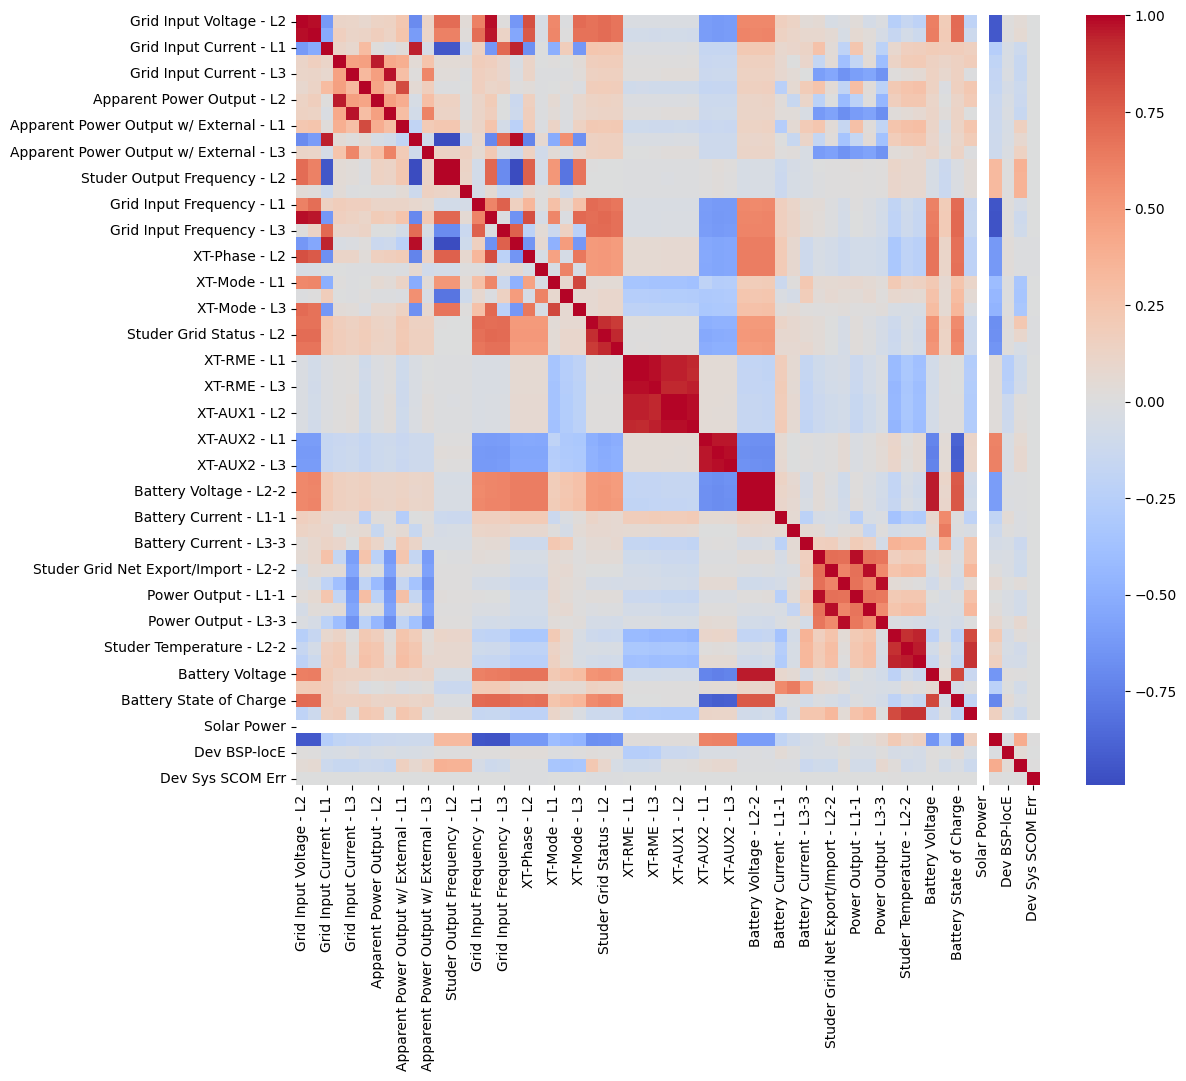

In [14]:
studer_corr = studer_data.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(studer_corr, cmap='coolwarm', annot=False)